# pNeuma understanding the urban traffic monitoring with massive drone data

## Summary: 
When it comes to transportation data, it is emphasized that traffic monitoring and analysis are one of the most important tools. And there are different techniques to collect data from traffic, such as cameras, sensors, GPS, and Unmanned Aerial Systems or called drones.

The pNeuma (New Era of Urban traffic Monitoring with Aerial footage) is an urban dataset to study congestion focused on the use of drones. The goal of this experiment is to record traffic streams in a multi-modal congested environment over an urban setting using UAS that can allow the deep investigation of critical traffic phenomena.

The advantages of the use of drones are that the use of expensive satellites is not necessary, they can be equipped with communication systems to inform commuters in real-time and they have great capabilities in data acquisition. The term "swarm of drones" is used to refer to a coordinated team of drones flying together without colliding to perform a task, for that reason these are perfect to monitor traffic congestion in different parts of a congested city.

The chosen place for this experiment was the central district of the city of Athens, Greece was selected as an urban, multimodal, busy environment that can allow different kinds of transportation phenomena to be examined in which there are 6 types of vehicles that are Car, Taxi, Bus, Medium Vehicle, Heavy Vehicle, Motorcycle. The pNeuma uses a swarm of 10 drones hovering over the city over five days to record traffic streams in a congested area of a 1.3km^2 area with more than 100 km-lanes of road network, around 100 busy intersections (signalized or not), more than 30 bus stops and close to half a million trajectories. 

Drones allow to analyze different traffic parameters, such as speed, flow, density, shockwaves, signal cycle length, queue lengths, queue dissipation time etc. and capacity by generating origin-destination (OD) matrices in the scenario of urban roundabouts and four-legged intersections.

Given the city regulations, the data was captured in the morning peak (8:00-10:30) for each working day of a week. It was important to consider that drones are not able to record the traffic stream for 2.5 hours continuously, so the alternative was to fly the swarm in sequential sessions with 'blind' gaps between, so it was expected that 10 minutes of each 30 minutes of no data would cause no significant issues. 

On the official page of pNeuma we can find the different types of datasets that were captured by each drone in its respective area. The .csv is organized such that each row represents the data of a single vehicle, the first 10 columns in the 1st row include the columns’ names, the first 4 columns include information about the trajectory like the unique trackID, the type of vehicle, the distance traveled and the average speed of the vehicle, the last 6 columns are then repeated every 6 columns based on the time frequency. They can be downloaded depending on a selected date, and the time the capture was made. 


## Data Dictionary:

| Data       | Data Type | Description |Atributes/Measures|   |
|------------|------|-------------|---------|---|
| track_id   |Integer|Track Id of the type of vehicle|Specific "Id" to identify the vehicle type|   |
| Type       |String|Type of Vehicle|Car, Taxi, Bus, Medium Vehicle, Heavy Vehicle, Motorcycle.|   |
| traveled_d |Float|Distance Traveled for the Vehicle|Meters|   |
| lat        |Float|Geographic coodinate of one point from north to south in the earth superfice|Degrees ° (Coordinates in WGS-84)|   |
| lon        |Float|Geographic coordinate of one point from east to west in the earth superfice|Degrees ° (Coordinates in WGS-84)|   |
| speed      |Float|Velocity of movement of the vehicle|kilometers per hours(Km/hours)|   |
| lon_acc    |Float|Flat coordinates| meters/sec^2|   |
| lat_acc    |Float|Flat coordinates|meters/sec^2|   |
| time       |Float|Time took for the vehicle to move that final distance|Seconds (S)|   |

In [22]:
# Importing libraries 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.image as image
import seaborn as sns

In [2]:
def transform(x):
    """
    This function take the value divided by the delimiter ';' and return the best data type
    """
    try: return float(x)
    except: return x 

In [3]:
datos = {}
columns= [ "track_id", "type", "traveled_d", "avg_speed", "lat", "lon", "speed", "lon_acc", "lat_acc", "time"]

In [8]:
# Opening File
with open("20181101_d1_0800_0830.csv") as data:
    # Reading the lines
    for idx,line in enumerate(data.readlines()):
        # Skipping the columns names
        if idx>0: 
            # Fixing the index
            idx -=1
            #Replacing
            line = line.replace("\n", "")
            line = line.replace(" ", "")
            # Dividing the values
            data_line = line.split(";")
            # Correcting the data type
            data_line = [transform(x) for x in data_line]
            #Assigning the correct values
            aux = {columns[0]:data_line[0],
                   columns[1]:data_line[1], 
                   columns[2]:data_line[2], 
                   columns[3]:data_line[3], 
                   columns[4]:data_line[4],
                  columns[5]:data_line[5],
                   columns[6]:data_line[6],
                   columns[7]:data_line[7],
                   columns[8]:data_line[8],
                  columns[9]:data_line[9],
                  "extra":data_line[10:]}
            datos[idx] = aux
    # Closing the file
    data.close()

In [9]:
# Creating the dataframe
neuma =pd.DataFrame(datos).T

In [10]:
neuma.head()

,track_id,type,traveled_d,avg_speed,lat,lon,speed,lon_acc,lat_acc,time,extra
0,1,Motorcycle,107.61,17.6086,37.9775,23.7371,13.4787,0.0466,-0.066,38.4,"[37.977484, 23.737107, 13.4811, 0.0383, -0.071..."
1,2,Car,20.82,20.8205,37.9773,23.7378,18.8439,-0.1994,0.3039,39,"[37.977303, 23.737758, 18.8316, -0.1754, 0.326..."
2,3,Car,66.16,13.3808,37.9776,23.7376,20.0741,0.4261,-0.1982,39,"[37.977592, 23.737563, 20.1005, 0.3749, -0.215..."
3,4,Motorcycle,9.36,33.6855,37.9772,23.7378,35.0891,0,0,39,"[37.977202, 23.737833, 35.0891, 0.0, -0.0, 39...."
4,5,Motorcycle,38.18,31.2405,37.9774,23.7377,33.1028,0.16,0.2156,39,"[37.977441, 23.737687, 33.1146, 0.151, 0.2328,..."


In [11]:
print(f'The shape of dataset is {neuma.shape[0]} instances and {neuma.shape[1]} columns')

The shape of dataset is 785 instances and 11 columns


In [12]:
neuma.describe().T

,count,unique,top,freq
track_id,785,785,802,1
type,785,6,Car,443
traveled_d,785,762,68.79,2
avg_speed,785,785,20.6925,1
lat,785,283,37.9783,21
lon,785,319,23.7354,18
speed,785,780,0,6
lon_acc,785,709,0,16
lat_acc,785,628,0,15
time,785,684,39,22


In [13]:
# Looking for NaN values
neuma.isnull().sum()

track_id      0
type          0
traveled_d    0
avg_speed     0
lat           0
lon           0
speed         0
lon_acc       0
lat_acc       0
time          0
extra         0
dtype: int64

In [15]:
neuma.head()

,track_id,type,traveled_d,avg_speed,lat,lon,speed,lon_acc,lat_acc,time,extra
0,1,Motorcycle,107.61,17.6086,37.9775,23.7371,13.4787,0.0466,-0.066,38.4,"[37.977484, 23.737107, 13.4811, 0.0383, -0.071..."
1,2,Car,20.82,20.8205,37.9773,23.7378,18.8439,-0.1994,0.3039,39,"[37.977303, 23.737758, 18.8316, -0.1754, 0.326..."
2,3,Car,66.16,13.3808,37.9776,23.7376,20.0741,0.4261,-0.1982,39,"[37.977592, 23.737563, 20.1005, 0.3749, -0.215..."
3,4,Motorcycle,9.36,33.6855,37.9772,23.7378,35.0891,0,0,39,"[37.977202, 23.737833, 35.0891, 0.0, -0.0, 39...."
4,5,Motorcycle,38.18,31.2405,37.9774,23.7377,33.1028,0.16,0.2156,39,"[37.977441, 23.737687, 33.1146, 0.151, 0.2328,..."


In [16]:
neuma.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 785 entries, 0 to 784
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   track_id    785 non-null    object
 1   type        785 non-null    object
 2   traveled_d  785 non-null    object
 3   avg_speed   785 non-null    object
 4   lat         785 non-null    object
 5   lon         785 non-null    object
 6   speed       785 non-null    object
 7   lon_acc     785 non-null    object
 8   lat_acc     785 non-null    object
 9   time        785 non-null    object
 10  extra       785 non-null    object
dtypes: object(11)
memory usage: 73.6+ KB


In [17]:
# Changing the data type of the columns
neuma['traveled_d'] = neuma['traveled_d'].astype(float)
neuma['avg_speed'] = neuma['avg_speed'].astype(float)
neuma['lat'] = neuma['lat'].astype(float)
neuma['lon'] = neuma['lon'].astype(float)
neuma['speed'] = neuma['speed'].astype(float)
neuma['lon_acc'] = neuma['lon_acc'].astype(float)
neuma['lat_acc'] = neuma['lat_acc'].astype(float)
neuma['time'] = neuma['time'].astype(float)

In [19]:
neuma.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 785 entries, 0 to 784
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   track_id    785 non-null    object 
 1   type        785 non-null    object 
 2   traveled_d  785 non-null    float64
 3   avg_speed   785 non-null    float64
 4   lat         785 non-null    float64
 5   lon         785 non-null    float64
 6   speed       785 non-null    float64
 7   lon_acc     785 non-null    float64
 8   lat_acc     785 non-null    float64
 9   time        785 non-null    float64
 10  extra       785 non-null    object 
dtypes: float64(8), object(3)
memory usage: 73.6+ KB


In [20]:
# Total number of type of vehicle
ax = neuma.type.value_counts()
ax

Car              443
Motorcycle       153
Taxi             137
MediumVehicle     30
Bus               20
HeavyVehicle       2
Name: type, dtype: int64

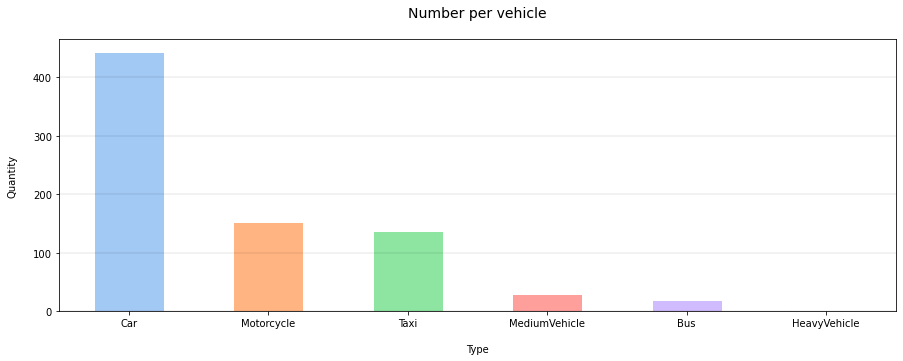

In [23]:
# The number of vehicles per category
fig, ax = plt.subplots(figsize=(15, 5))
ax = neuma.type.value_counts().nlargest(10).plot(kind='bar', color=sns.color_palette('pastel',10), edgecolor='white') 
plt.title("Number per vehicle\n", size=14)
plt.xlabel("\nType")
plt.xticks(rotation=0)
plt.ylabel("Quantity\n");

ax.grid(axis='y', linestyle='-', linewidth=.1, color='black')
plt.show()

In [24]:
# Grouping by type of vehicle
Cars = neuma.loc[neuma['type'] == "Car"]
Motorcycle = neuma.loc[neuma['type'] == "Motorcycle"]
Taxi = neuma.loc[neuma['type'] == "Taxi"]
MediumVehicle = neuma.loc[neuma['type'] == "MediumVehicle"]
Bus = neuma.loc[neuma['type'] == "Bus"]
HeavyVehicle = neuma.loc[neuma['type'] == "HeavyVehicle"]

In [20]:
x = neuma.loc[1].extra[0:-2:2]
y = neuma.loc[1].extra[1::2]

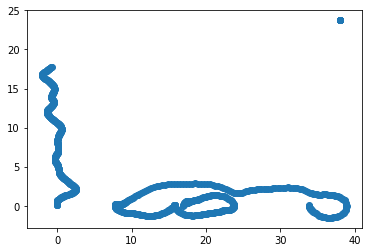

In [21]:
plt.scatter(x,y)

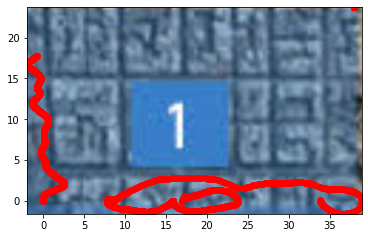

In [22]:
img_array=plt.imread("Cuadro 1.PNG") 
plt.imshow(img_array, zorder=0, extent=[min(x),max(x), min(y),max(y)])
plt.scatter(x,y, c="r")
#plt.title('Display Image read using imread()') 
#plt.axis('off')
plt.show()

## Extra Material:
1. https://github.com/UAS4TCompetition/Results/blob/master/Codes/Team%207/UAS4T.pdf
2. https://ieee-itsc2020.org/wp-content/uploads/2020/07/UAS-Collected-Traffic-Data-Analysis-UAS4T-Competition.pdf
3. https://github.com/UAS4TCompetition/Results/blob/master/Codes/Team%2013/Traffic_prediction_competition_for_ITSC_2020.pdf
4. https://github.com/UAS4TCompetition/Results/blob/master/Codes/Team%2015/UAS4T%20Competition%20-GUC-MRS-Overall%20Report%20.pdf
5. https://github.com/UAS4TCompetition/Results/blob/master/Codes/Team%2018/Report.pdf
6. https://github.com/UAS4TCompetition/Results/blob/master/Codes/Team%2021/uas4t_tl_team_report-revised.pdf
7. https://github.com/UAS4TCompetition/Results/blob/master/Codes/Team%204/Proposed_Approach.pdf
8. https://github.com/UAS4TCompetition/Results/blob/master/Codes/Team%205/3.short%20paper%20explaining%20the%20approach.pdf